In [1]:
import numpy as np
import os #운영체제(Operating System)에서 제공하는 기능을 실행
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd



C:\Users\Flora\anaconda3\envs\seun\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Flora\anaconda3\envs\seun\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Flora\anaconda3\envs\seun\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Flora\anaconda3\envs\seun\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
path = os.path.join("datasets","housing","C:/Users/Flora/Documents/.이세은/3-1 교과목/머신러닝/추가자료/housing.csv") #datasets\housing\housing.csv
housing = pd.read_csv(path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

housing["ocean_proximity"].value_counts() #각 카테고리에 얼마나 많은 값들이 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


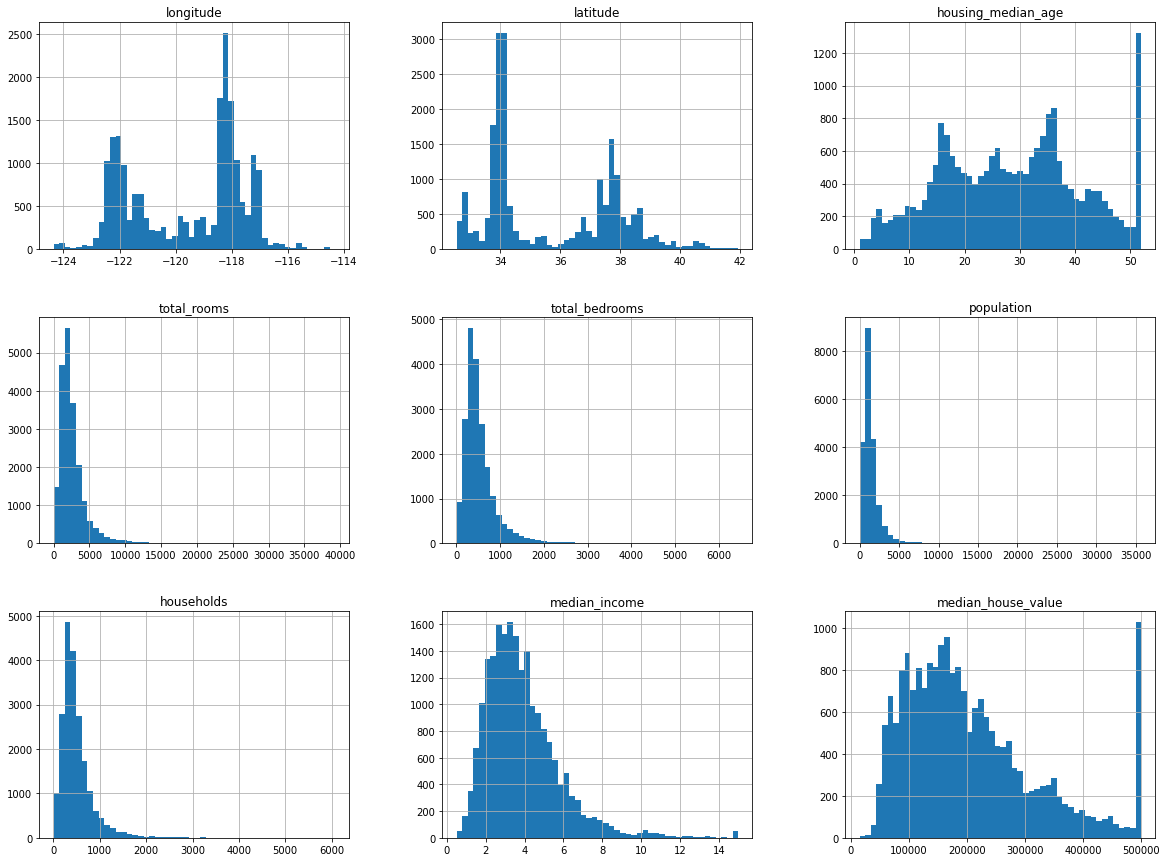

In [5]:
housing.hist(bins=50, figsize=(20,15)) #막대가 50개인 히스토그램 생성
plt.show()

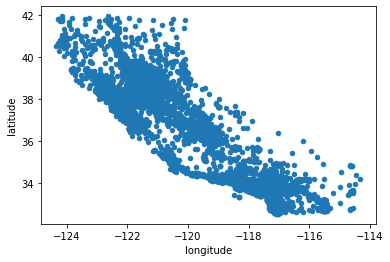

In [6]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

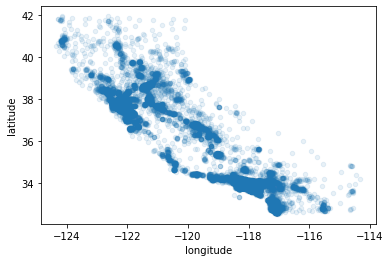

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # density measure : alpha
plt.show()

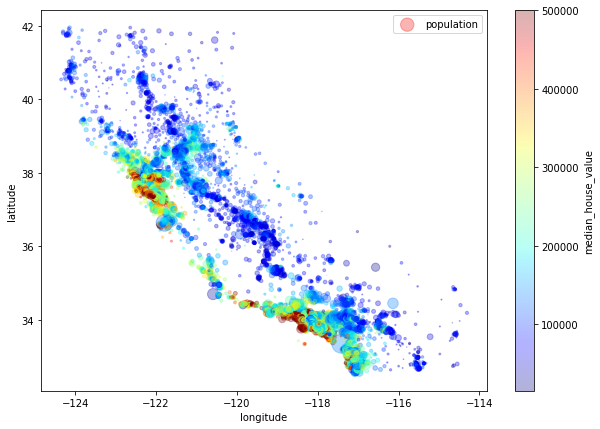

In [8]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False) # s: size, c: color reference, cmap: mapping option, sharex: sharing same x axis
plt.legend()
plt.show()

In [9]:
corr_matrix = housing.corr() #피어슨 상관계수, 1: 양의기울기, -1:음의기울기, 0:은 데이터 관계가 없다는것이 아니라 선형표현어렵다는 뜻
corr_matrix["median_house_value"].sort_values(ascending=False)# 상관계수 순서대로 소팅

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

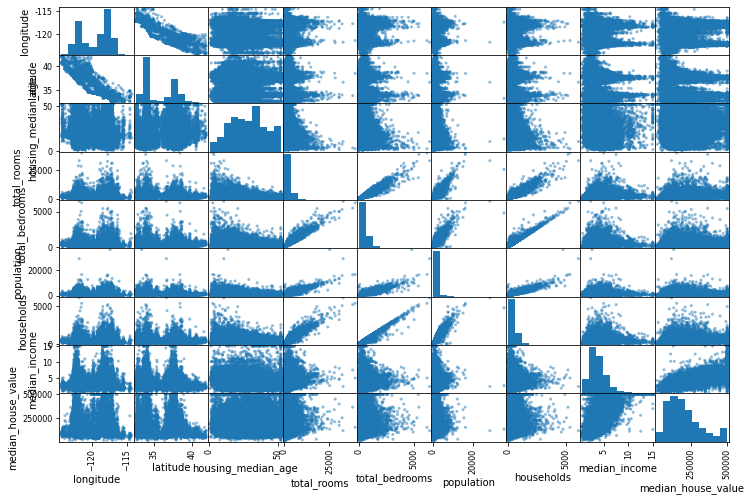

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing, figsize=(12, 8))
plt.show()

<AxesSubplot:>

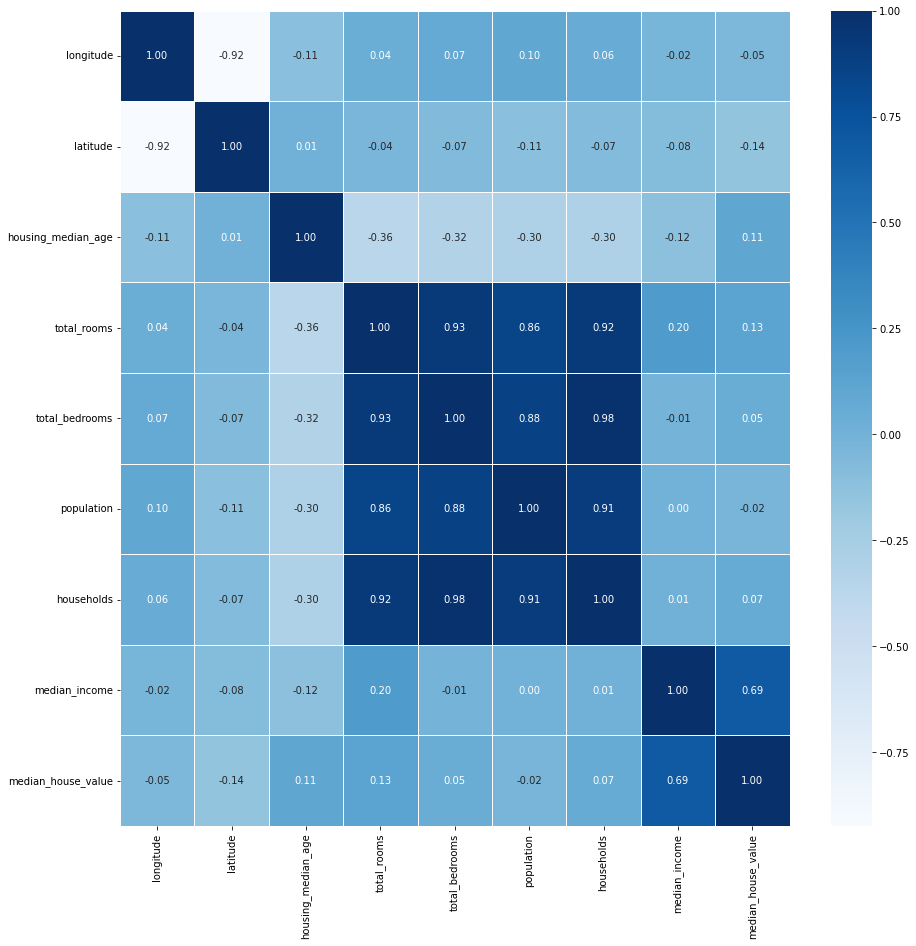

In [11]:
import seaborn as sns  

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues') # annot: 셀값 표시, fmt: 숫자표시형식


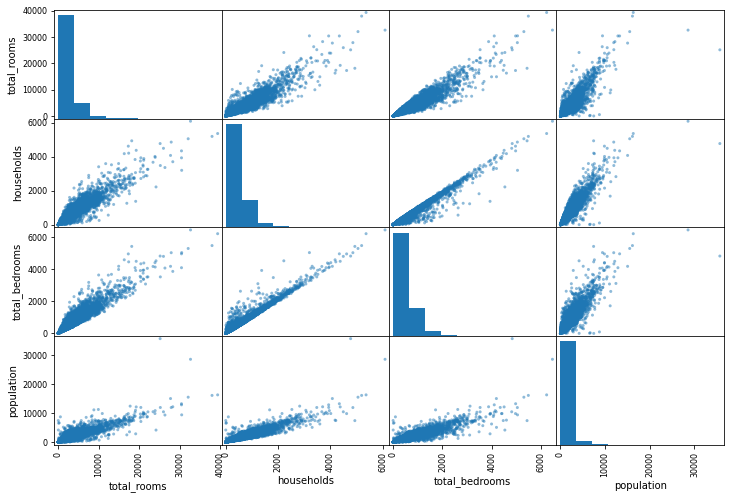

In [12]:
#median_house_value와의 표준 상관 관계는 많은 변수에서 낮게 나왔으므로, 각각의 독립적인 변수를 이용하기에는 크게 도움이 되지 못함. 
# 그러나 변수 사이에 높은 상관 관계가 있었으므로 해당 변수들을 활용하여 좀 더 의미있는 변수를 생성해 낼지도 모름
attributes = ["total_rooms", "households", "total_bedrooms", "population"] 
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [13]:
housing[attributes].corr()

,total_rooms,households,total_bedrooms,population
total_rooms,1.000000,0.918484,0.930380,0.857126
households,0.918484,1.000000,0.979728,0.907222
total_bedrooms,0.930380,0.979728,1.000000,0.877747
population,0.857126,0.907222,0.877747,1.000000


In [14]:
# 세변수를 새로 만듦
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()

In [16]:
corr_matrix["median_house_value"].sort_values(ascending=False)
#rooms_per_household , bedrooms_per_room 는 기존 변수보다 상관관계가 더 크게 나옴

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64